## Machine Learning - Regression

##### Loading dataset

In [73]:
# -*- coding : utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

# --- dataset ---
dataset_1 = 'https://raw.githubusercontent.com/Princy59/ML-Shopee/main/Marketing_Data.csv'
df = pd.read_csv(dataset_1, delimiter=',')
X= df.values[:, 0:3]
y= df.values[:, 3]

df.info()
# df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, train_size=0.7, test_size=0.3, random_state=100)

# --- random generated datasets ---
# X, y = make_regression(n_samples=200, n_features=3, noise=1, random_state=100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [74]:
# Checking data correlation
### --- if using random generated data, please uncomment the next line---
# df = pd.DataFrame(np.concatenate([X, np.vstack(y)], axis=1), columns=['youtube', 'facebook', 'newspaper', 'sales'])

df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


##### Simple Linear Regression~

coefficient of determination: -0.12416861532575818
intercept: 13.468978326803562
coefficients: 0.09176689536099171



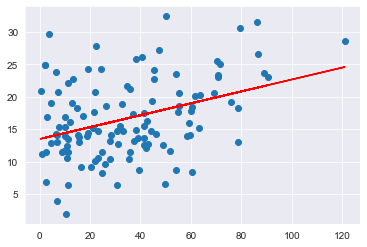

In [75]:
feature_to_use = 'newspaper'
label = 'sales'

sl_X, sl_y = df[feature_to_use].to_numpy(), df[label].to_numpy()
sl_X_train, sl_X_test, sl_y_train, sl_y_test = train_test_split(sl_X, sl_y, train_size=0.7, test_size=0.3, random_state=100)

# -- Training
slrm = LinearRegression()
slrm.fit(sl_X_train.reshape(-1, 1), sl_y_train)

# -- Testing
slrm_r_sq = slrm.score(sl_X_test.reshape(-1, 1), sl_y_test)
print(f"coefficient of determination: {slrm_r_sq}")
print(f"intercept: {slrm.intercept_}")
print(f"coefficients: {slrm.coef_[0]}")
print()
plt.scatter(sl_X_train, sl_y_train)
plt.plot(sl_X_train, slrm.intercept_ + slrm.coef_[0]*sl_X_train, 'r')
plt.show()

##### Multi Linear Regression~

In [76]:
features_to_use = ['youtube', 'facebook', 'newspaper']
ml_X, ml_y = df[features_to_use].to_numpy(), df[label].to_numpy()
ml_X_train, ml_X_test, ml_y_train, ml_y_test = train_test_split(ml_X, ml_y, train_size=0.7, test_size=0.3, random_state=100)

# -- Training
mlrm = LinearRegression()
mlrm.fit(ml_X_train, ml_y_train)

# -- Testing
mlrm_r_sq = mlrm.score(ml_X_test, ml_y_test)
print(f"coefficient of determination: {mlrm_r_sq}")
print(f"intercept: {mlrm.intercept_}")
print(f"coefficients: {mlrm.coef_}")

coefficient of determination: 0.9077879242447484
intercept: 3.4741738274521285
coefficients: [0.04525354 0.17341231 0.01563912]


##### Ridge Regression~

--- SIMPLE LINEAR REGRESSION ---
coefficient of determination: -0.12416861532575818
intercept: 13.468978326803562
coefficients: [0.0917669]

--- RIDGE REGRESSION ---
coefficient of determination: -0.12385616796687171
intercept: 13.473358026696044
coefficients: [0.09163998]



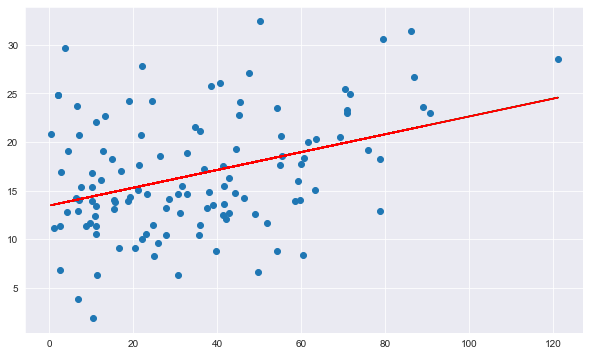

In [77]:
features_to_use = [feature_to_use]
# features_to_use = ['youtube', 'facebook', 'newspaper']
rr_X, rr_y = df[features_to_use].to_numpy(), df[label].to_numpy()
rr_X_train, rr_X_test, rr_y_train, rr_y_test = train_test_split(rr_X, rr_y, train_size=0.7, test_size=0.3, random_state=100)

# -- Training
rrm = Ridge(alpha=100,)
if len(features_to_use) == 1:
    rrm.fit(rr_X_train.reshape(-1, 1), rr_y_train)
else:
    rrm.fit(rr_X_train, rr_y_train)

# -- Testing
if len(features_to_use) == 1:
    rrm_r_sq = rrm.score(rr_X_test.reshape(-1, 1), rr_y_test)
else:
    rrm_r_sq = rrm.score(rr_X_test, rr_y_test)

if len(features_to_use) == 1:
    print('--- SIMPLE LINEAR REGRESSION ---')
    print(f"coefficient of determination: {slrm_r_sq}")
    print(f"intercept: {slrm.intercept_}")
    print(f"coefficients: {slrm.coef_}")
    print('\n--- RIDGE REGRESSION ---')
print(f"coefficient of determination: {rrm_r_sq}")
print(f"intercept: {rrm.intercept_}")
print(f"coefficients: {rrm.coef_}")

if len(features_to_use) == 1:
    print()
    plt.figure(figsize=(10,6))
    plt.scatter(rr_X_train, rr_y_train)
    plt.plot(rr_X_train, slrm.intercept_ + slrm.coef_[0]*rr_X_train, 'g')
    plt.plot(rr_X_train, rrm.intercept_ + rrm.coef_[0]*rr_X_train, 'r')
    plt.show()

### SEA STOCKS PRICES DATA

In [107]:
import yfinance as yf

stock_ticker = 'SE'
start = '2022-08-01'
end = '2023-03-20'

data = yf.download(stock_ticker, start, end)
print(data.corr())

data.drop(['Volume', 'Adj Close'], inplace=True, axis=1)
print()
data.info()
print('\n', data.head())

[*********************100%***********************]  1 of 1 completed
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.988552  0.987858  0.974171   0.974171  0.128723
High       0.988552  1.000000  0.988070  0.989030   0.989030  0.204825
Low        0.987858  0.988070  1.000000  0.990368   0.990368  0.090684
Close      0.974171  0.989030  0.990368  1.000000   1.000000  0.163805
Adj Close  0.974171  0.989030  0.990368  1.000000   1.000000  0.163805
Volume     0.128723  0.204825  0.090684  0.163805   0.163805  1.000000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 2022-08-01 to 2023-03-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    159 non-null    float64
 1   High    159 non-null    float64
 2   Low     159 non-null    float64
 3   Close   159 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB

                  Open       High        Low   

coefficient of determination: 0.988193208813442
intercept: 0.15227379620046833
coefficients: [-0.58844295  0.76516575  0.82296663]

Predict unseen value (Python Model): 15.669551008207092
Predict unseen value (SQL): 15.669551008207092


<AxesSubplot:>

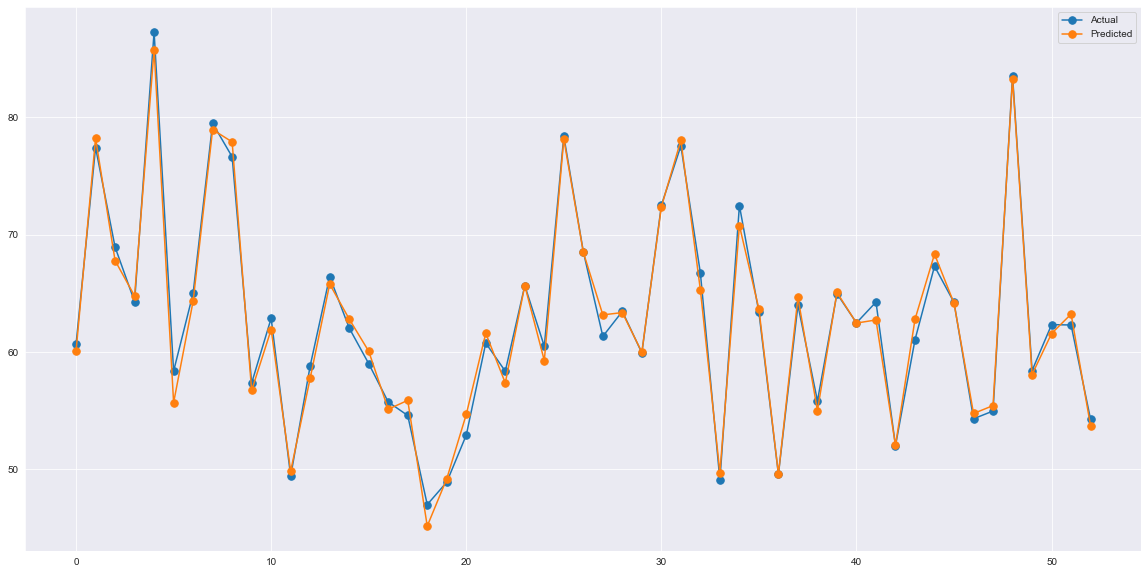

In [110]:
# Linear Regression
X = data[['Open', 'High', 'Low']].values
y = data['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, test_size=0.33, random_state=100)

# -- Training
stocks_model = LinearRegression(normalize=True)
stocks_model.fit(X_train, y_train)

# -- Testing
stocks_r_sq = stocks_model.score(X_test, y_test)
print(f"coefficient of determination: {stocks_r_sq}")
print(f"intercept: {stocks_model.intercept_}")
print(f"coefficients: {stocks_model.coef_}")
print()

# Python Model
print('Predict unseen value (Python Model):', stocks_model.predict([[16.1, 16.399, 15.12]])[0])
# SQL
print('Predict unseen value (SQL):', (stocks_model.intercept_ + (16.1 * stocks_model.coef_[0]) + (16.399 * stocks_model.coef_[1]) + (15.12 * stocks_model.coef_[2])))


df_pred = pd.DataFrame(y_test, columns=['Actual'])
df_pred['Predicted'] = stocks_model.predict(X_test)
df_pred[['Actual', 'Predicted']].plot(figsize=(20,10), style='.-', ms=15)